In [1]:
import numpy as np
# 訓練データと検証データの分割
from sklearn.model_selection import train_test_split
# データを扱う
import pandas as pd
# グラフ描画
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


# 訓練データの読み込み

In [2]:
class TrainDataset():
    def __init__(self):
        super().__init__()
        
        # CSVファイル読み込み（訓練データ）
        df = pd.read_csv('train.csv')
        
        # 不正データの補正 (レコード削除のパターンもあるため、ファイル読み込み直後に処理する)
        df = self.correction(df)
        
        # 説明変数と目的変数に分割する
        df_x = df.drop(['loan_status'], axis=1)
        self.df_y = df.loc[:,['loan_status']]
        self.targetConv()
        
        # 説明変数の量的データ、質的データ分割
        self.x_cate , self.x_cont = self.DataChange(df_x.copy())
        self.x_desc = self.x_cont.describe()
        
        # データの加工（標準化や対数化など）
        #self.std_scale = 0
        #self.max_scale = 0
        #self.dobule_scale = 0
        #self.polynomialFlg = 0
        #self.binSplitFlg = 0
        self.logFlg = 0
        self.DataConv()
        
        #self.NpToPy()
        #self.num = len(self.X_train)
        self.num = len(self.x_cont)
        self.coti_size = self.x_cont.shape[1]
        
        
    
    def correction(self, df):
        
        print('null check')
        print(df.isnull().sum())
        print('-------------------------')
        
        return df
    
    def viewDescribe(self):
        self.x_cont.describe()
        self.x_cate.describe(include='O')
    
    def dropCol(self):
        self.x_cate_conv = self.x_cate.copy()
        self.x_cate_conv.drop(columns=['employment_length'], axis=1)
        # application_typeは使ってみる
        
        self.x_cont_conv = self.x_cont.copy()
        self.x_cont_conv.drop(columns=['loan_amnt'], axis=1)
        # credit_scoreは使ってみる（差があるかは要確認）
        
    def DataChange(self, df_x):
        categ_cols = ['term' ,'grade' ,'employment_length', 'purpose' ,'application_type']
        contin_cols = ['loan_amnt', 'interest_rate', 'credit_score']

        ####################################
        ##  データ分割
        ##  説明変数と目的変数に分ける。
        ##  説明変数はカテゴリデータと連続データに分ける。
        ####################################
        x_cate = df_x[categ_cols].copy()
        x_cont = df_x[contin_cols].copy()
        
        return x_cate , x_cont
    
    def targetConv(self):
        self.df_y = self.df_y.replace('FullyPaid', '0').replace('ChargedOff', '1')
        self.df_y.astype('float32')
        
    def NpToPy(self):
        
        #tmp = self.x_cont[['displacement_log', 'horsepower_log', 'weight_log', 'acceleration_log']]
        #tmp = self.x_cont[['horsepower_log', 'weight_log', 'acceleration_log']]
        
        x_temp = pd.concat([self.x_cate_conv , self.x_cont_conv] , axis=1)
        #x_temp = self.x_cont.copy()
        x_temp = np.array(x_temp)
        y_temp = np.array(self.df_y)
        
        # 訓練データと検証データに分割
        x_train,x_test,y_train,y_test=train_test_split(x_temp, y_temp, test_size=0.2, random_state=3) 
        
        # 
        self.X_train = x_train
        self.Y_train = y_train
        self.X_test = x_test
        self.Y_test = y_test
        
        self.coti_size = self.x_cont.shape[1]
        self.in_size  = self.X_train.shape[1]
        self.out_size = self.Y_train.shape[1]  
        
    def DataConv(self):
        
        
        self.dropCol()
        self.NpToPy()
        

In [3]:
train_dataset = TrainDataset()

null check
id                   0
loan_amnt            0
term                 0
interest_rate        0
grade                0
employment_length    0
purpose              0
credit_score         0
application_type     0
loan_status          0
dtype: int64
-------------------------


In [4]:
class TestDataset(TrainDataset):
    def __init__(self, x_desc):
        
        # CSVファイル読み込み（訓練データ）
        df = pd.read_csv('test.csv' )
        
        # 不正データの補正 (レコード削除のパターンもあるため、ファイル読み込み直後に処理する)
        df = self.correction(df)
        
        # 目的変数の格納
        self.x_cate , self.x_cont = self.DataChange(df.copy())
        self.x_desc = x_desc
        
        # データの加工（標準化や対数化など）
        #self.std_scale = 0
        #self.max_scale = 0
        #self.dobule_scale = 0
        #self.polynomialFlg = 0
        #self.binSplitFlg = 0
        self.logFlg  = 0
        self.DataConv()
        
        #self.NpToPy()
        #self.num = len(self.x_cate)
        self.num = len(self.x_cont)
        self.coti_size = self.x_cont.shape[1]

    def __getitem__(self, index):
        return self.X_test[index]
    
    def __len__(self):
        return self.num
    
    def NpToPy(self):
        
        x_temp = pd.concat([self.x_cate , self.x_cont] , axis=1)
        
        #x_temp = self.x_cont.copy()
        x_temp = np.array(x_temp)
        
        # numpy の値を torch の値に変換する
        self.X_vat = x_temp



In [5]:
test_dataset = TestDataset(train_dataset.x_desc)

null check
id                   0
loan_amnt            0
term                 0
interest_rate        0
grade                0
employment_length    0
purpose              0
credit_score         0
application_type     0
dtype: int64
-------------------------


# 訓練データのデータ表示

## 説明変数

In [6]:
# データ型
train_dataset.x_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242150 entries, 0 to 242149
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   loan_amnt      242150 non-null  float64
 1   interest_rate  242150 non-null  float64
 2   credit_score   242150 non-null  float64
dtypes: float64(3)
memory usage: 5.5 MB


In [7]:
train_dataset.x_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242150 entries, 0 to 242149
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   term               242150 non-null  object
 1   grade              242150 non-null  object
 2   employment_length  242150 non-null  object
 3   purpose            242150 non-null  object
 4   application_type   242150 non-null  object
dtypes: object(5)
memory usage: 9.2+ MB


In [8]:
# 返済期間
train_dataset.x_cate['term'].value_counts()

3 years    189887
5 years     52263
Name: term, dtype: int64

In [9]:
# グレード
train_dataset.x_cate['grade'].value_counts()

C4    18936
B4    18409
C1    16767
B2    16357
B3    16058
B1    15484
B5    15163
C2    13917
C5    11420
A5    10785
D1    10464
C3    10266
D4     9828
A4     9441
D2     8823
D3     8387
D5     6866
A3     6532
A1     5764
A2     5749
E2     2835
E4     2301
E1      640
E5      535
E3      416
F5        4
F3        3
Name: grade, dtype: int64

In [10]:
# 勤続年数
train_dataset.x_cate['employment_length'].value_counts()

10 years    103339
0 years      19373
9 years      18374
2 years      15783
1 year       15141
6 years      14815
4 years      13418
5 years      12812
7 years      12673
3 years      11295
8 years       5127
Name: employment_length, dtype: int64

In [11]:
# 申請方法
train_dataset.x_cate['application_type'].value_counts()

Individual    240368
Joint App       1782
Name: application_type, dtype: int64

## 目的変数

In [12]:
train_dataset.df_y['loan_status'].value_counts()

0    199794
1     42356
Name: loan_status, dtype: int64

# データの可視化

In [13]:
train_dataset.x_cont.describe()

,loan_amnt,interest_rate,credit_score
count,242150.000000,242150.000000,242150.000000
mean,1520.389009,13.801496,683.575024
std,830.250197,4.588924,29.554795
min,323.797279,5.704849,655.424269
25%,761.954545,10.876086,659.531106
50%,1212.680586,13.543833,678.672563
75%,2152.213330,17.172395,698.591960
max,3851.867974,27.980604,808.551641


In [14]:
train_dataset.x_cont.loc[train_dataset.df_y.index[train_dataset.df_y['loan_status']=='0'],:].copy()

,loan_amnt,interest_rate,credit_score
0,609.296068,8.421982,714.061803
2,695.783256,14.723425,656.419357
3,738.392546,14.260708,657.906852
4,1642.400654,25.217452,662.972297
5,3502.170573,22.868578,663.337598
...,...,...,...
242144,1022.965398,6.568938,791.296767
242145,2427.939262,13.673803,657.206417
242147,2089.513458,8.218123,724.556339
242148,3459.367114,14.875958,688.249378


In [15]:
# 返済済
n_x_cont = train_dataset.x_cont.loc[train_dataset.df_y.index[train_dataset.df_y['loan_status']=='0'],:].copy()
# 貸し倒れ
d_x_cont = train_dataset.x_cont.loc[train_dataset.df_y.index[train_dataset.df_y['loan_status']=='1'],:].copy()

# 返済済
n_x_cate = train_dataset.x_cate.loc[train_dataset.df_y.index[train_dataset.df_y['loan_status']=='0'],:].copy()
# 貸し倒れ
d_x_cate = train_dataset.x_cate.loc[train_dataset.df_y.index[train_dataset.df_y['loan_status']=='1'],:].copy()


df_cate = pd.concat([train_dataset.x_cate, train_dataset.df_y] , axis=1)

df_cont = pd.concat([train_dataset.x_cont, train_dataset.df_y] , axis=1)

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


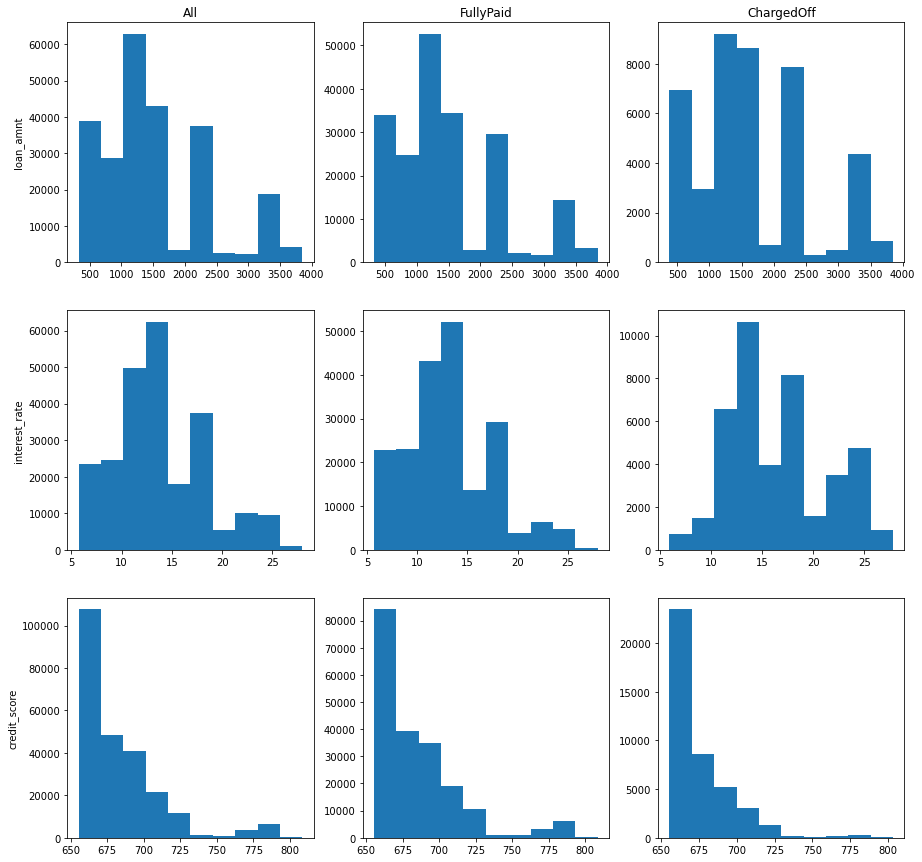

In [16]:
col_val=3
row_val=train_dataset.x_cont.shape[1]

i = 0
plt.figure(figsize=(15,15))

for col in n_x_cont.columns.values:
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    
    #  全レコード
    plt.hist([train_dataset.x_cont.loc[:, col]])
    if (i + 1) == 1:
        plt.title('All')
    plt.ylabel(col)
    i += 1    
    
    # 返済済
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([n_x_cont.loc[:, col]])
    if (i + 1) == 2:
        plt.title('FullyPaid')
    i += 1
    
    # 貸し倒れ
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    plt.hist([d_x_cont.loc[:, col]])
    if (i + 1) == 3:
        plt.title('ChargedOff')
    i += 1

plt.show()

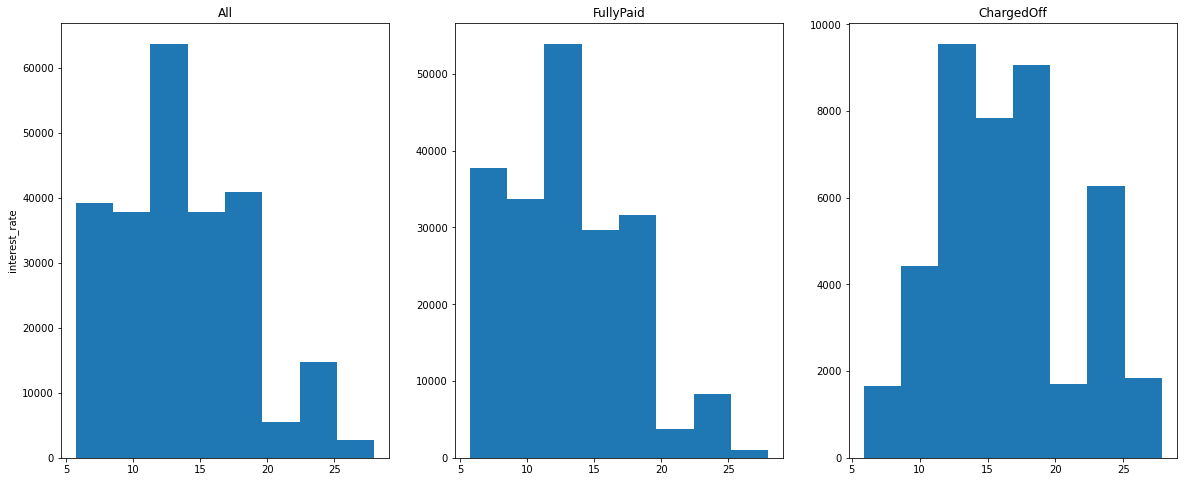

In [24]:
plt.figure(figsize=(20,8))

col_val=3
row_val=1
i = 0

col = 'interest_rate'

plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    
#  全レコード
plt.hist([train_dataset.x_cont.loc[:, col]] , bins= 8)
if (i + 1) == 1:
    plt.title('All')
plt.ylabel(col)
i += 1    

# 返済済
plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
plt.hist([n_x_cont.loc[:, col]]  , bins= 8)
if (i + 1) == 2:
    plt.title('FullyPaid')
i += 1

# 貸し倒れ
plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
plt.hist([d_x_cont.loc[:, col]]  , bins= 8)
if (i + 1) == 3:
    plt.title('ChargedOff')
i += 1

plt.show()

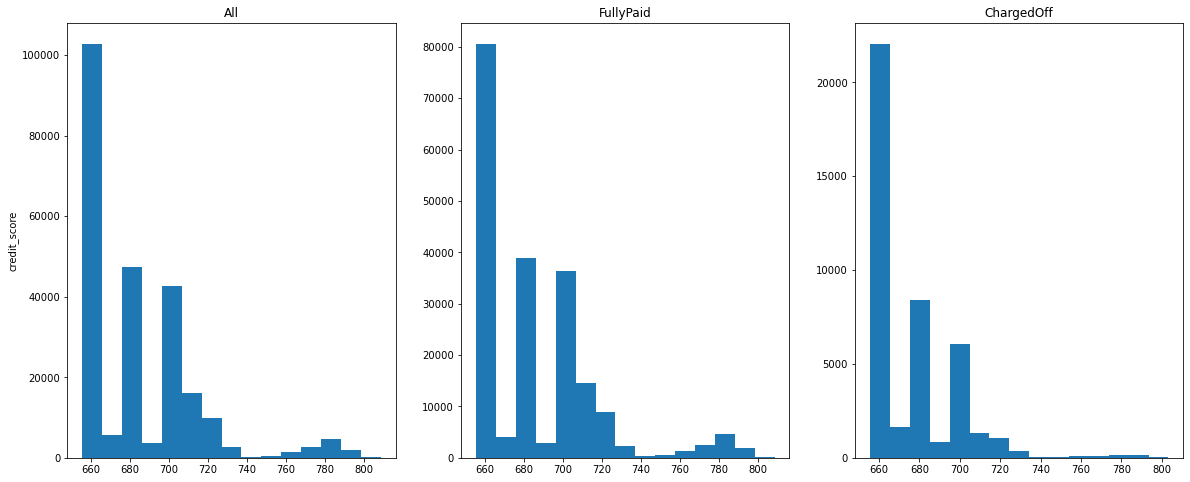

In [26]:
plt.figure(figsize=(20,8))

col_val=3
row_val=1
i = 0

col = 'credit_score'

plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    
#  全レコード
plt.hist([train_dataset.x_cont.loc[:, col]] , bins= 15)
if (i + 1) == 1:
    plt.title('All')
plt.ylabel(col)
i += 1    

# 返済済
plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
plt.hist([n_x_cont.loc[:, col]]  , bins= 15)
if (i + 1) == 2:
    plt.title('FullyPaid')
i += 1

# 貸し倒れ
plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
plt.hist([d_x_cont.loc[:, col]]  , bins= 15)
if (i + 1) == 3:
    plt.title('ChargedOff')
i += 1

plt.show()

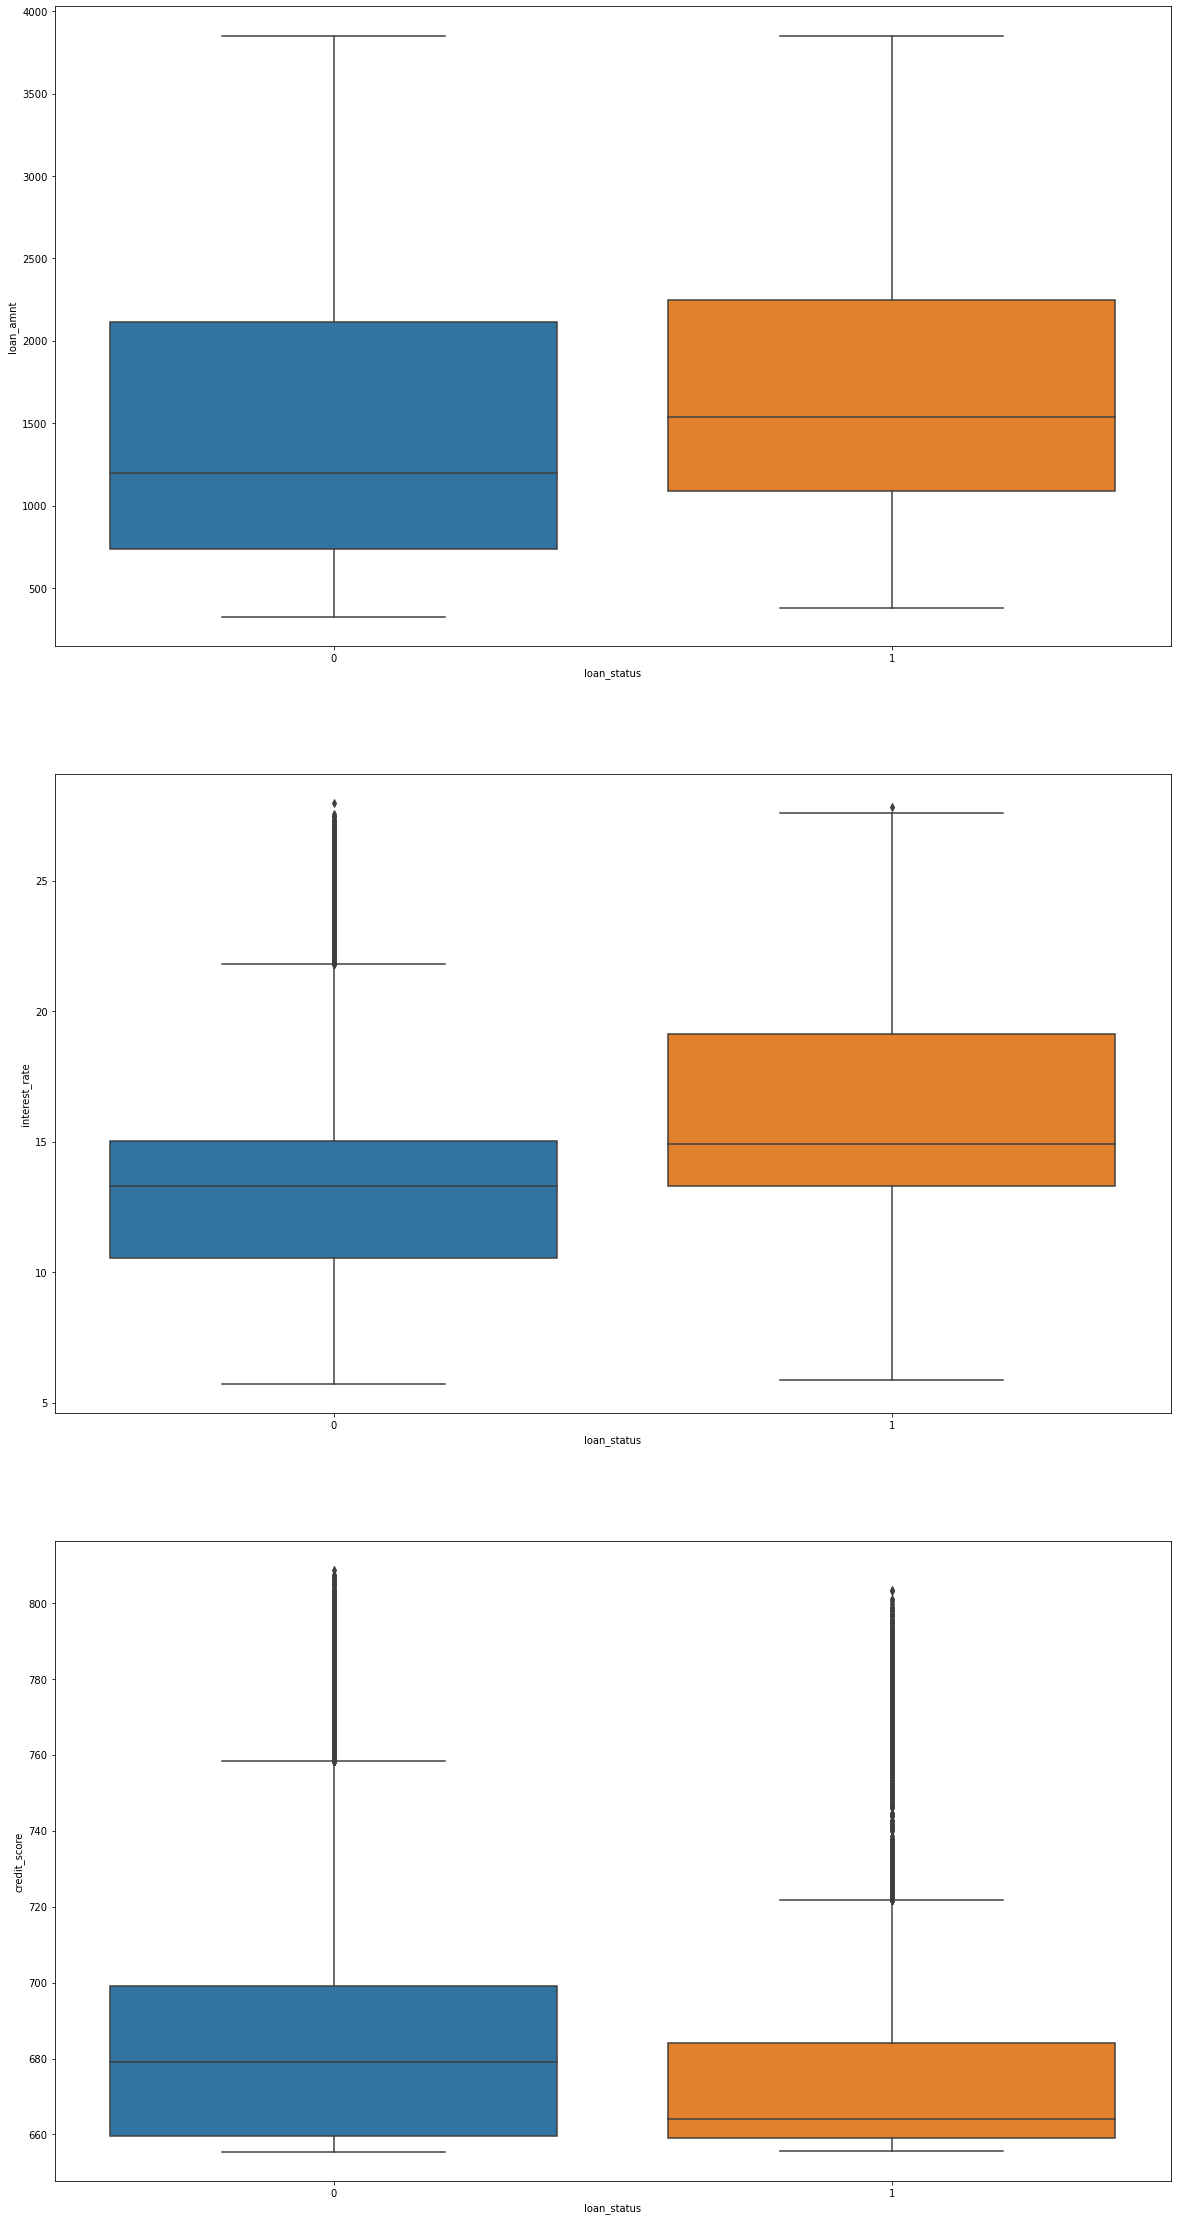

In [17]:
col_val=1
row_val=train_dataset.x_cont.shape[1]

i = 0
plt.figure(figsize=(20,40))

for col in n_x_cont.columns.values:
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    
    #  全レコード
    sns.boxplot(x="loan_status",y=col     ,data=df_cont)
    #if (i + 1) == 1:
    #    plt.title('All')
    #plt.ylabel(col)
    i += 1    


plt.show()

In [24]:

col = ['credit_score' , 'loan_status']
## 全件
#tmp = data.loc[data.index[data['bat_val'].isin([1]),col]
tmp1 = df_cont.loc[(df_cont.index[df_cont['credit_score'] > 700]) ,col].copy()
tmp2 = df_cont.loc[(df_cont.index[df_cont['credit_score'] <= 700]) ,col].copy()


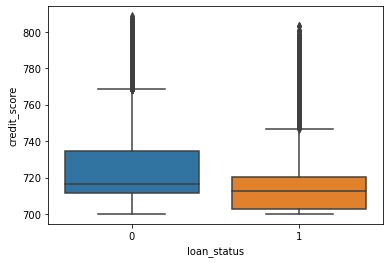

In [23]:
sns.boxplot(x="loan_status",y='credit_score'     ,data=tmp1)

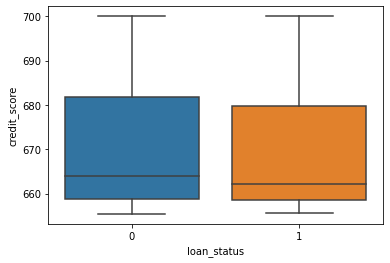

In [25]:
sns.boxplot(x="loan_status",y='credit_score'     ,data=tmp2)

In [26]:
tmp1['loan_status'].value_counts()

0    45418
1     4968
Name: loan_status, dtype: int64

In [27]:
tmp2['loan_status'].value_counts()

0    154376
1     37388
Name: loan_status, dtype: int64

In [28]:
df_cont['loan_status'].value_counts()

0    199794
1     42356
Name: loan_status, dtype: int64

In [44]:
tmp1 = df_cont.loc[(df_cont.index[df_cont['credit_score'] > 720]) ,col].copy()
tmp2 = df_cont.loc[(df_cont.index[df_cont['credit_score'] <= 720]) ,col].copy()

In [45]:
tmp1['loan_status'].value_counts()

0    18234
1     1273
Name: loan_status, dtype: int64

In [46]:
tmp2['loan_status'].value_counts()

0    181560
1     41083
Name: loan_status, dtype: int64

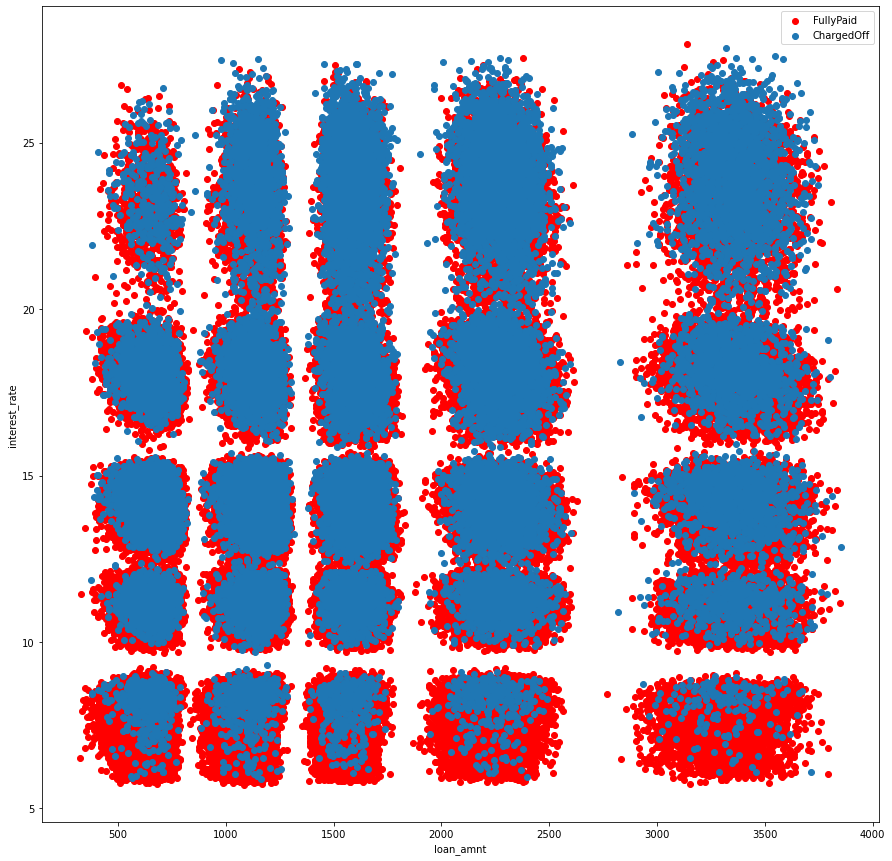

In [53]:
col1 = 'loan_amnt'
col2 = 'interest_rate'

plt.figure(figsize=(15,15))
plt.scatter(n_x_cont.loc[:, col1], n_x_cont.loc[:, col2], label="FullyPaid" , c='red')
plt.scatter(d_x_cont.loc[:, col1], d_x_cont.loc[:, col2], label="ChargedOff")  

plt.legend()
plt.xlabel(col1)
plt.ylabel(col2) 

plt.show()


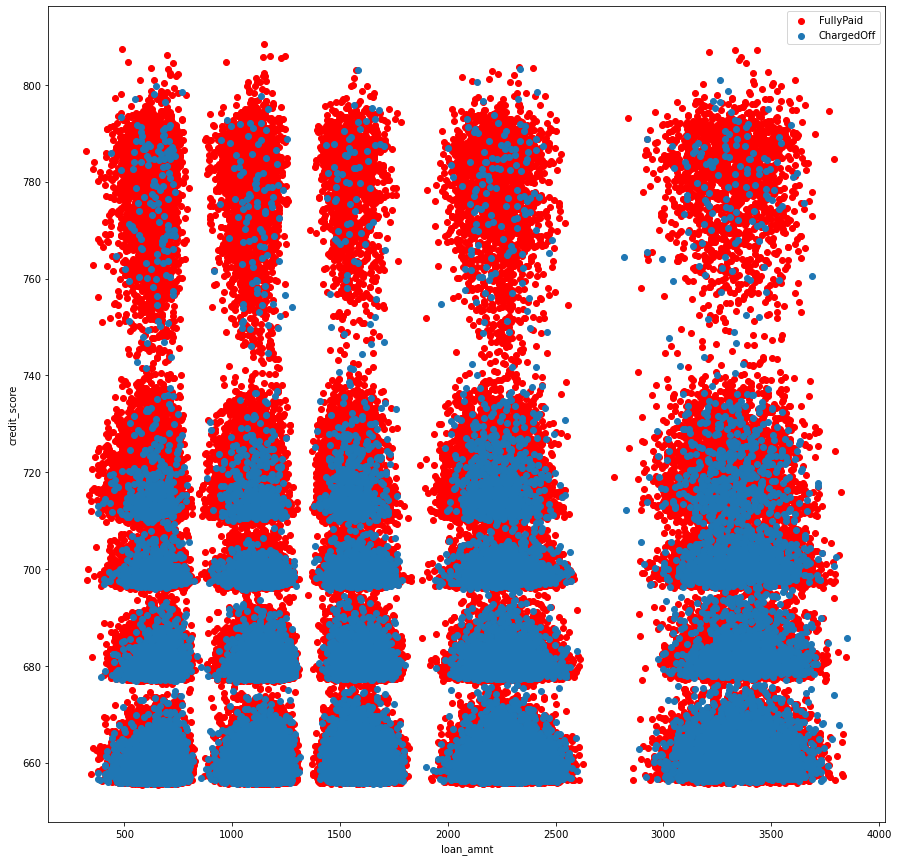

In [51]:
col1 = 'loan_amnt'
col2 = 'credit_score'

plt.figure(figsize=(15,15))

plt.scatter(n_x_cont.loc[:, col1], n_x_cont.loc[:, col2], label="FullyPaid" , c='red')      
plt.scatter(d_x_cont.loc[:, col1], d_x_cont.loc[:, col2], label="ChargedOff") 

plt.legend()
plt.xlabel(col1)
plt.ylabel(col2) 

plt.show()


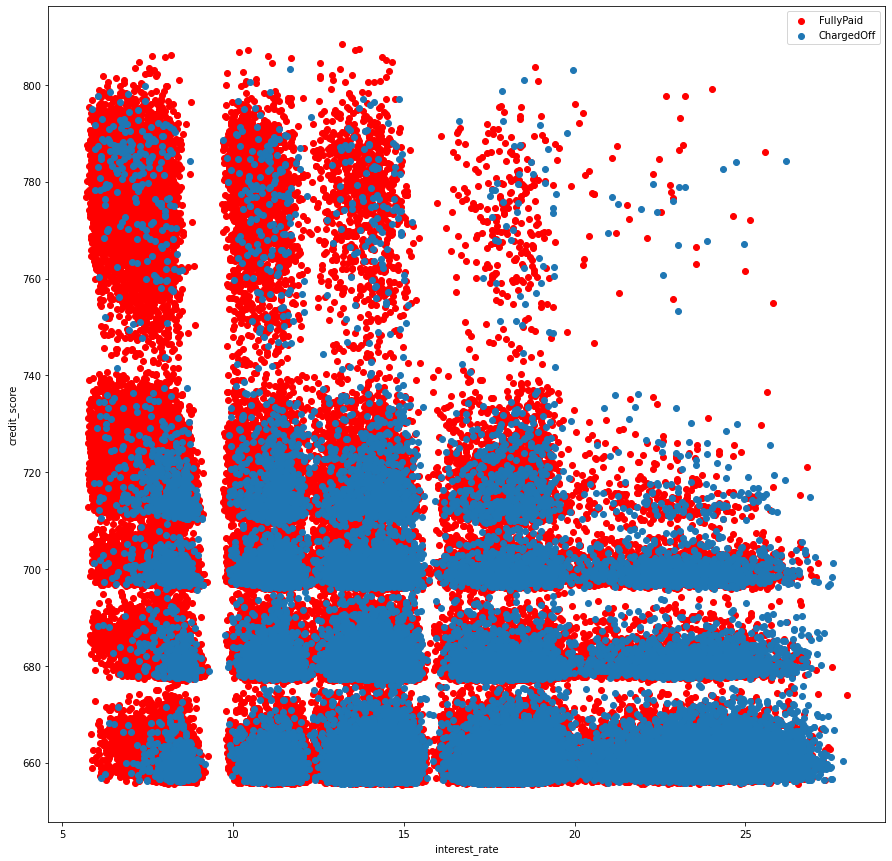

In [52]:
col1 = 'interest_rate'
col2 = 'credit_score'
plt.figure(figsize=(15,15))
plt.scatter(n_x_cont.loc[:, col1], n_x_cont.loc[:, col2], label="FullyPaid"  , c='red')      
plt.scatter(d_x_cont.loc[:, col1], d_x_cont.loc[:, col2], label="ChargedOff")  
plt.legend()
plt.xlabel(col1)
plt.ylabel(col2) 

plt.show()


## カテゴリデータ

In [21]:
train_dataset.x_cate.describe(include='O')

,term,grade,employment_length,purpose,application_type
count,242150,242150,242150,242150,242150
unique,2,27,11,9,2
top,3 years,C4,10 years,debt_consolidation,Individual
freq,189887,18936,103339,160207,240368


In [22]:
col='term'
label=list(train_dataset.x_cate[col].value_counts().index)
label=np.sort(label)
print(label)

['3 years' '5 years']


In [23]:
col='application_type'
label=list(train_dataset.x_cate[col].value_counts().index)
label=np.sort(label)
print(label)
print(len(label))

['Individual' 'Joint App']
2


In [54]:
col='purpose'
label=list(train_dataset.x_cate[col].value_counts().index)
label=np.sort(label)
print(label)
print(len(label))

['car' 'credit_card' 'debt_consolidation' 'home_improvement' 'house'
 'major_purchase' 'medical' 'other' 'small_business']
9


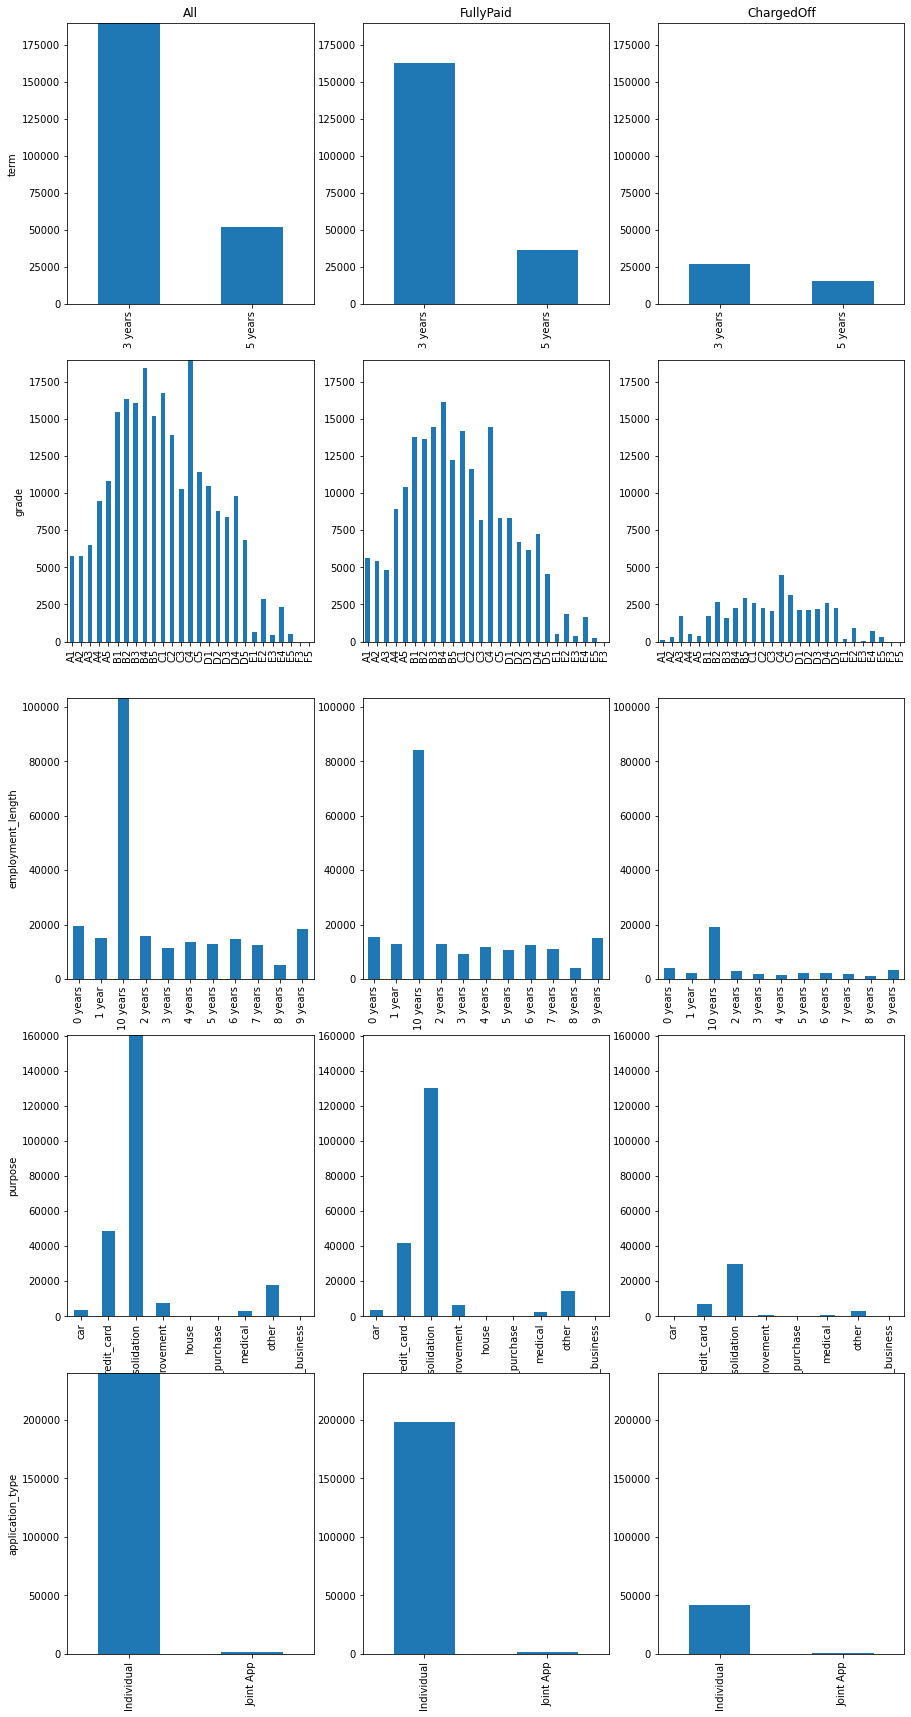

In [19]:
col_val=3
row_val=train_dataset.x_cate.shape[1]

i = 0
plt.figure(figsize=(15,30))

for col in train_dataset.x_cate.columns.values:
    
    label=list(train_dataset.x_cate[col].value_counts().index)
    label=np.sort(label)
    
    ymax = train_dataset.x_cate[col].value_counts().max()
    
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    
    #  全レコード
    value = train_dataset.x_cate[col].value_counts()
    #plt.bar([train_dataset.x_cate.loc[:, col]], tick_label=label)
    value = value.sort_index()
    value.plot.bar()
    plt.ylim(0 ,ymax)
    if (i + 1) == 1:
        plt.title('All')
    plt.ylabel(col)
    i += 1    
    
    # 返済済
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    #plt.bar([n_x_cate.loc[:, col]] ,tick_label=label)
    
    value = n_x_cate[col].value_counts()
    value = value.sort_index()
    value.plot.bar()
    plt.ylim(0 ,ymax)
    if (i + 1) == 2:
        plt.title('FullyPaid')
    i += 1
    
    # 貸し倒れ
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    #plt.bar([d_x_cate.loc[:, col]] ,tick_label=label)
    value = d_x_cate[col].value_counts()
    value = value.sort_index()
    value.plot.bar()
    plt.ylim(0 ,ymax)
    if (i + 1) == 3:
        plt.title('ChargedOff')
    i += 1

plt.show()

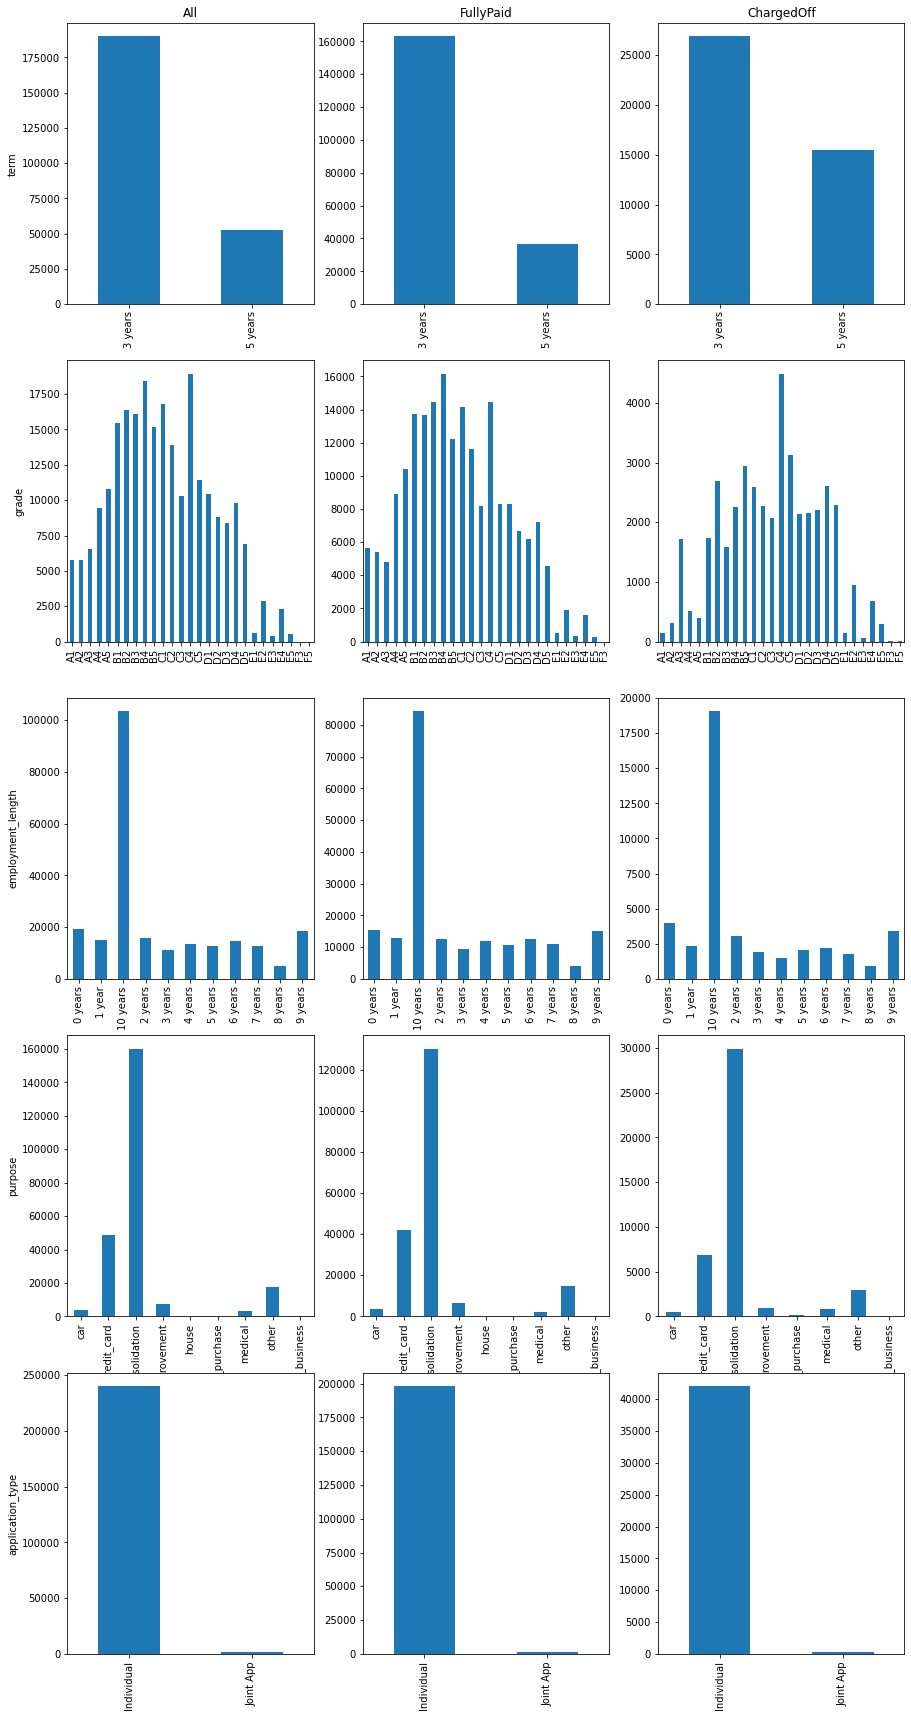

In [20]:
col_val=3
row_val=train_dataset.x_cate.shape[1]

i = 0
plt.figure(figsize=(15,30))

for col in train_dataset.x_cate.columns.values:
    
    label=list(train_dataset.x_cate[col].value_counts().index)
    label=np.sort(label)
    
    ymax = train_dataset.x_cate[col].value_counts().max()
    
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    
    #  全レコード
    value = train_dataset.x_cate[col].value_counts()
    #plt.bar([train_dataset.x_cate.loc[:, col]], tick_label=label)
    value = value.sort_index()
    value.plot.bar()
    if (i + 1) == 1:
        plt.title('All')
    plt.ylabel(col)
    i += 1    
    
    # 返済済
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    #plt.bar([n_x_cate.loc[:, col]] ,tick_label=label)
    
    value = n_x_cate[col].value_counts()
    value = value.sort_index()
    value.plot.bar()
    if (i + 1) == 2:
        plt.title('FullyPaid')
    i += 1
    
    # 貸し倒れ
    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    #plt.bar([d_x_cate.loc[:, col]] ,tick_label=label)
    value = d_x_cate[col].value_counts()
    value = value.sort_index()
    value.plot.bar()
    if (i + 1) == 3:
        plt.title('ChargedOff')
    i += 1

plt.show()

## 関連性のチェック

In [25]:
df = pd.concat([train_dataset.x_cont, train_dataset.x_cate] , axis=1)

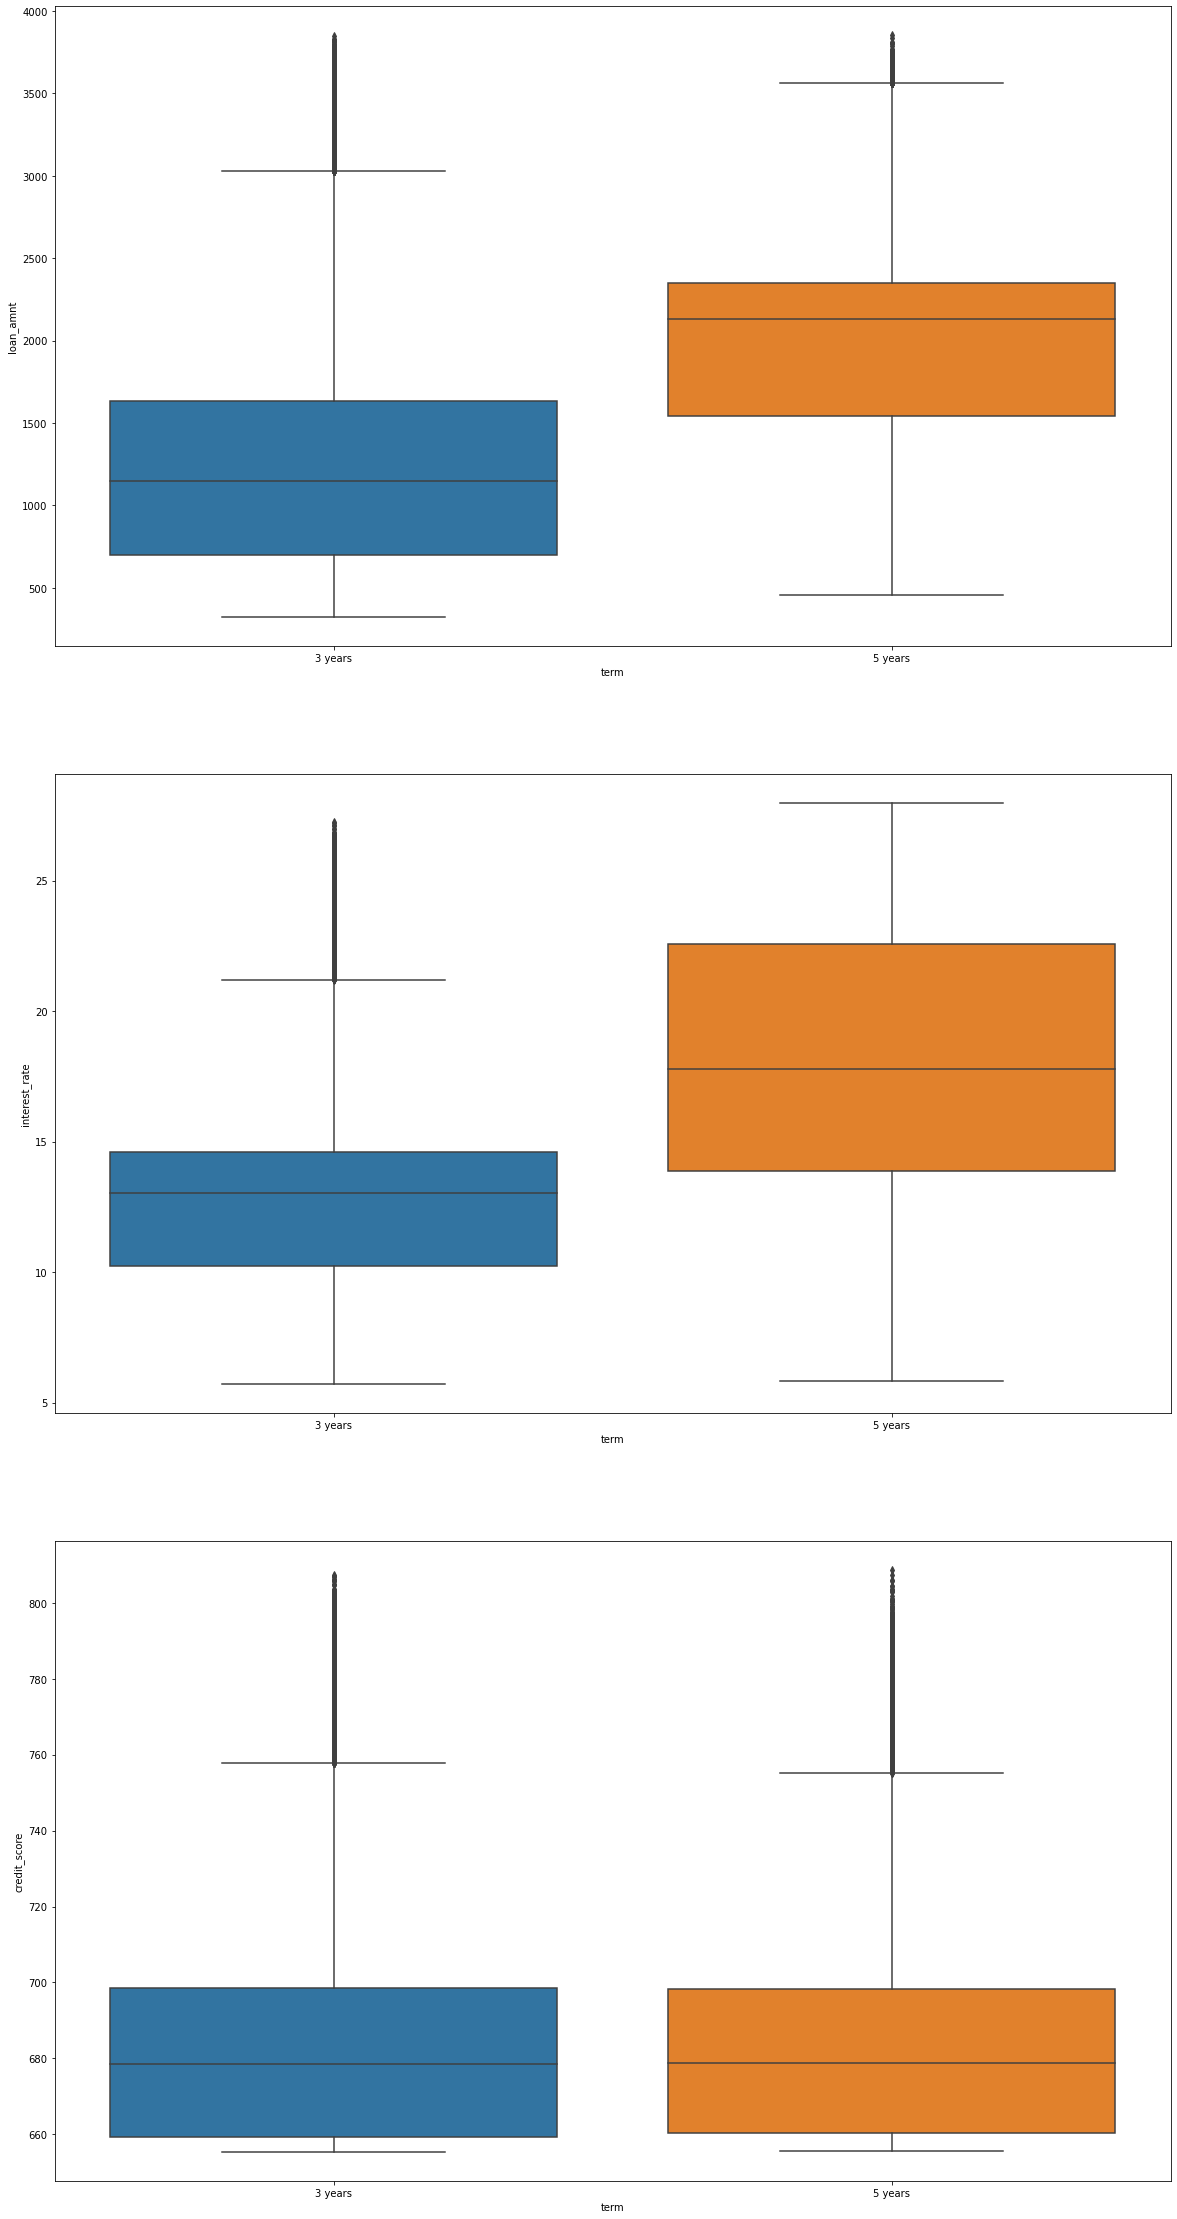

In [26]:
col_val=1
row_val=train_dataset.x_cont.shape[1]


i = 0
plt.figure(figsize=(20,40))

col2='term'

for col1 in train_dataset.x_cont.columns.values:


    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)

    #  全レコード
    sns.boxplot(x=col2 ,y=col1   ,data=df)
    #if (i + 1) == 1:
    #    plt.title(col2)
    plt.ylabel(col1)
    i += 1    

plt.show()

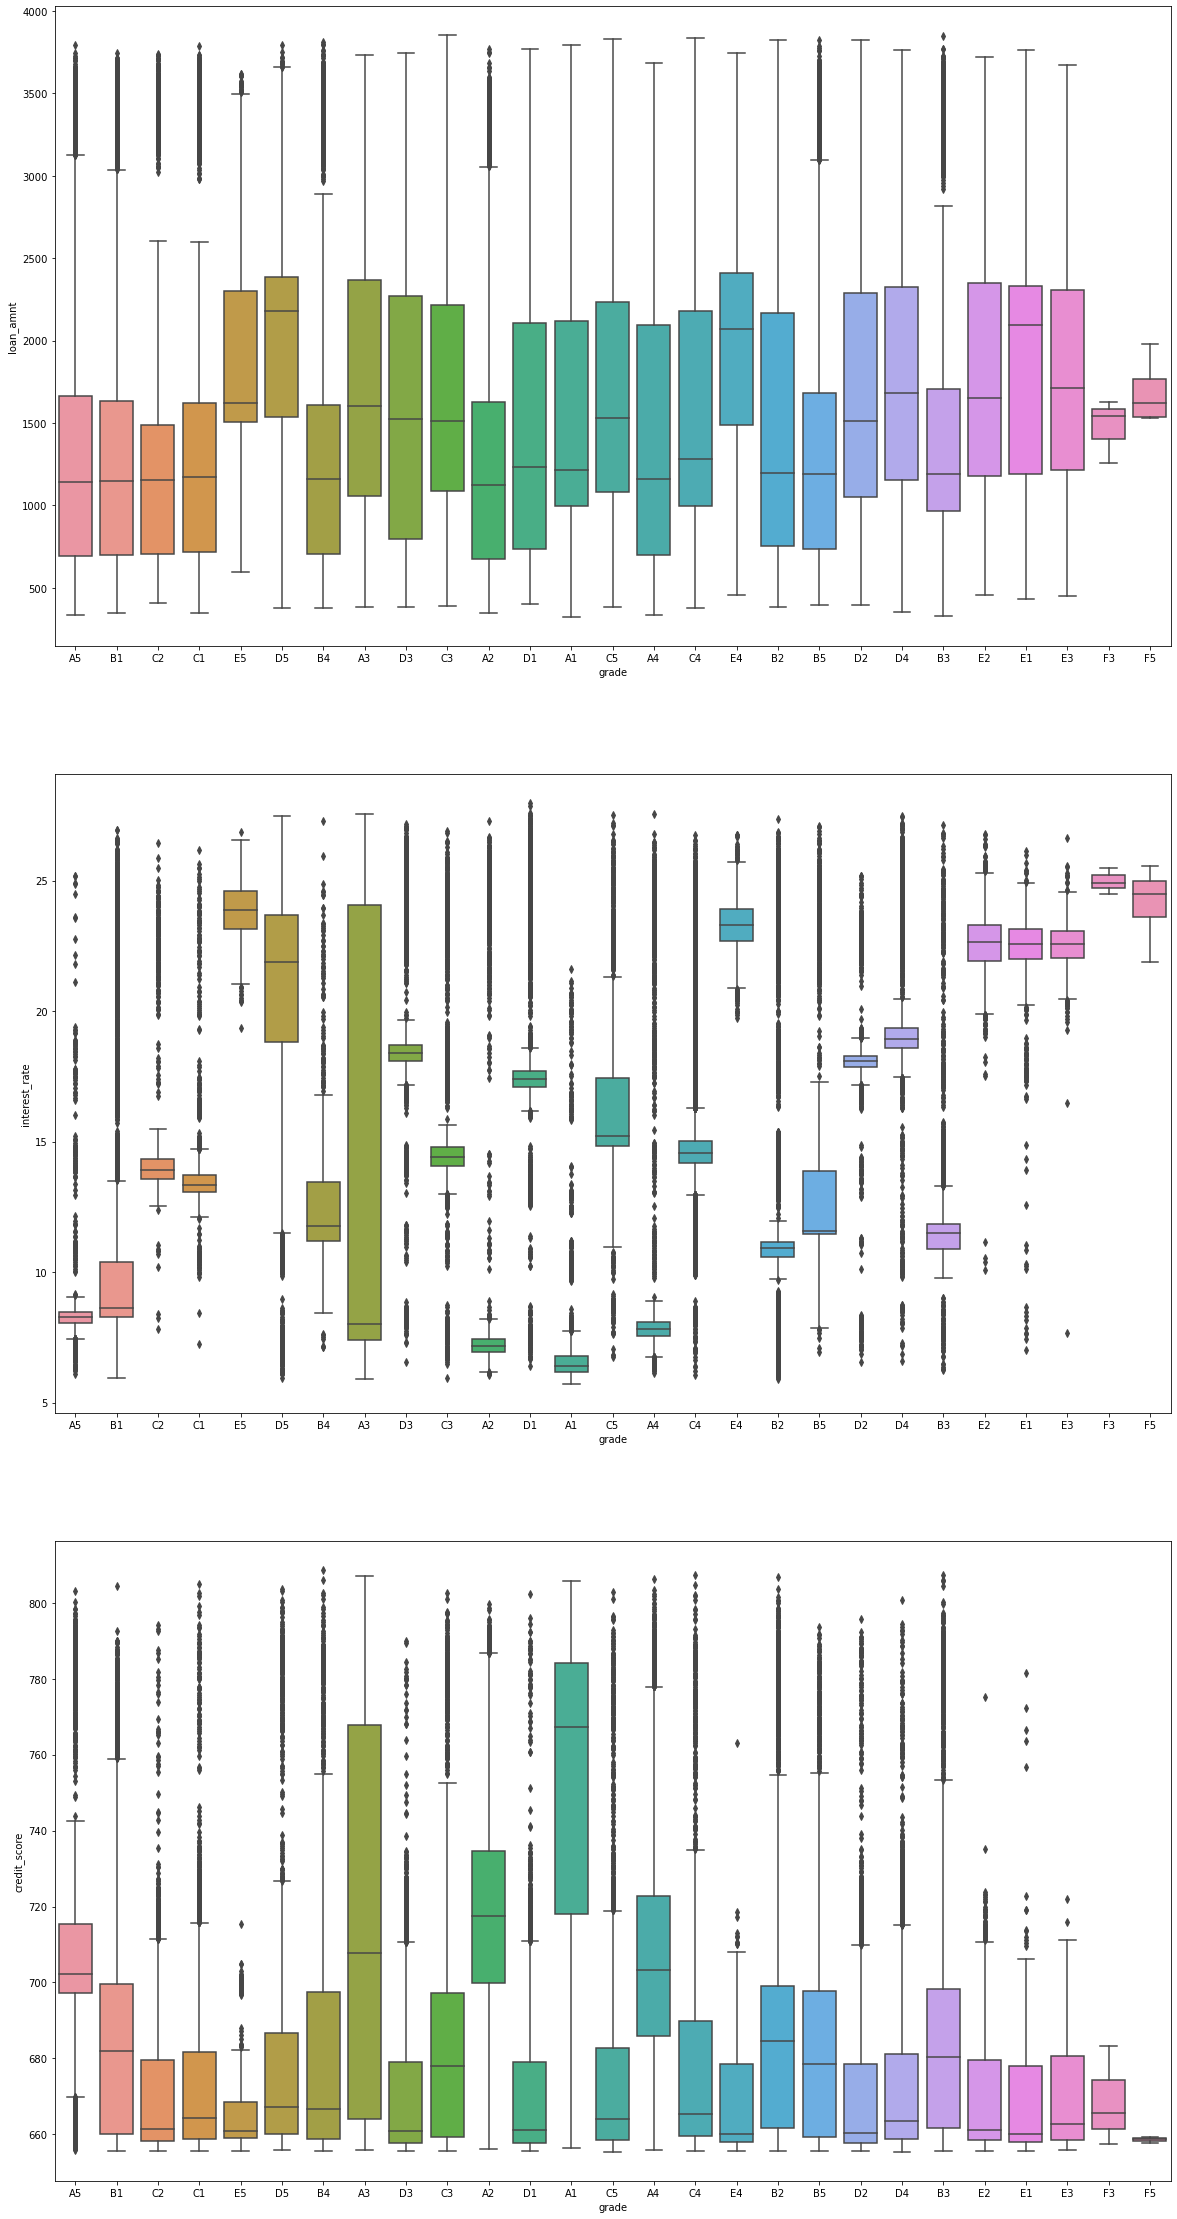

In [27]:
col_val=1
row_val=train_dataset.x_cont.shape[1]


i = 0
plt.figure(figsize=(20,40))

col2='grade'



for col1 in train_dataset.x_cont.columns.values:


    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)

    #  全レコード
    sns.boxplot(x=col2 ,y=col1   ,data=df)
    
    #if (i + 1) == 1:
    #    plt.title(col2)
    plt.ylabel(col1)
    i += 1    

plt.show()

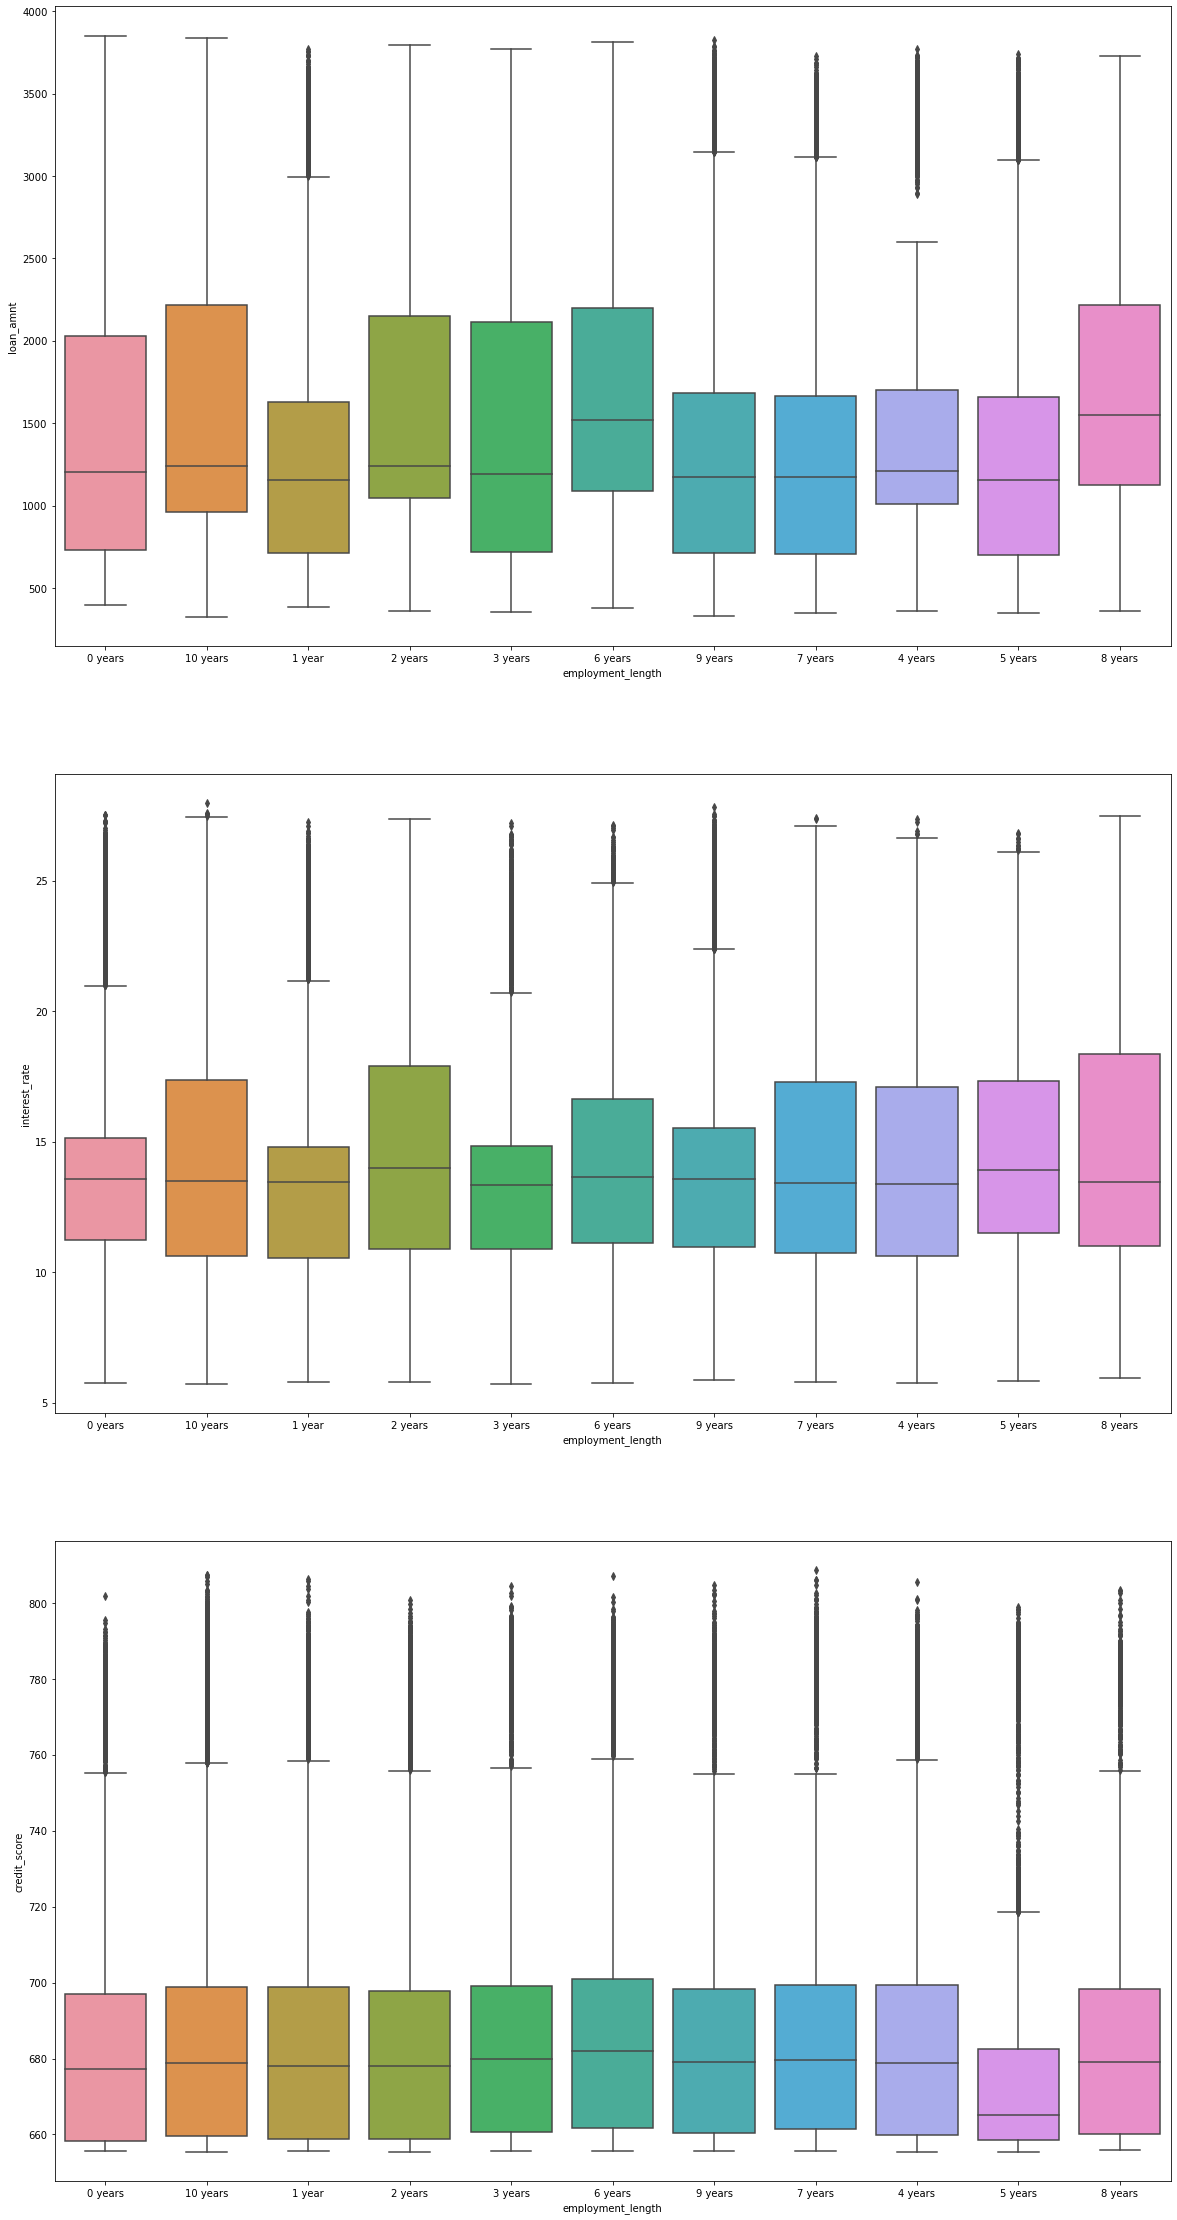

In [28]:
col_val=1
row_val=train_dataset.x_cont.shape[1]


i = 0
plt.figure(figsize=(20,40))

col2='employment_length'

label=list(train_dataset.x_cate[col2].value_counts().index)
label=np.sort(label)

for col1 in train_dataset.x_cont.columns.values:


    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)

    #  全レコード
    sns.boxplot(x=col2 ,y=col1   ,data=df)
    #if (i + 1) == 1:
    #    plt.title(col2)
    plt.ylabel(col1)
    i += 1    

plt.show()

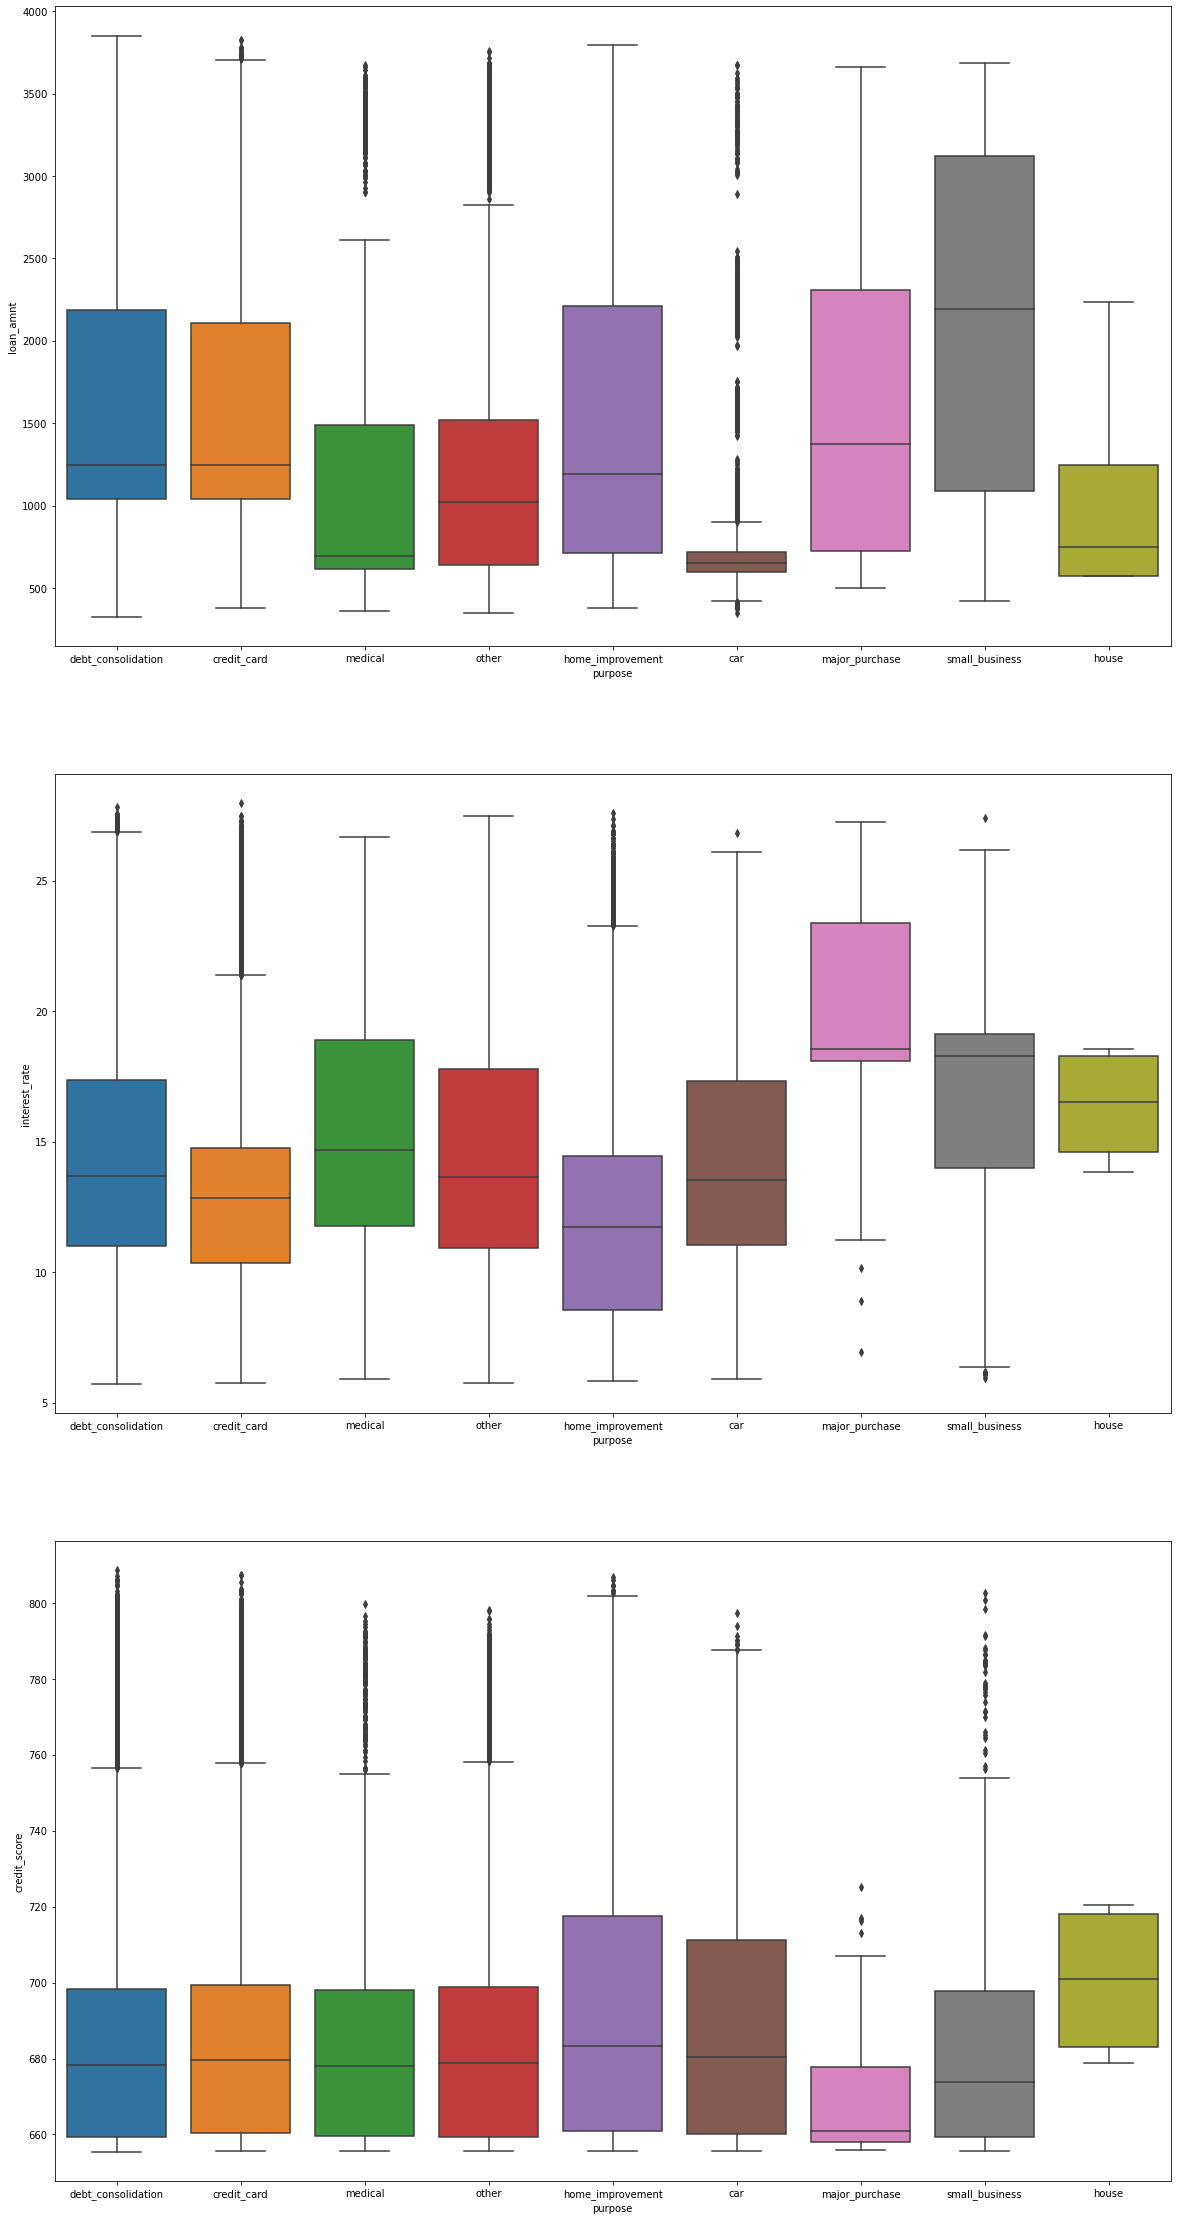

In [29]:
col_val=1
row_val=train_dataset.x_cont.shape[1]


i = 0
plt.figure(figsize=(20,40))

col2='purpose'

label=list(train_dataset.x_cate[col2].value_counts().index)
label=np.sort(label)

for col1 in train_dataset.x_cont.columns.values:


    plt.subplot(row_val, col_val, i + 1)  # 2行5列、i+1の位置  (画像表示の指示)

    #  全レコード
    sns.boxplot(x=col2 ,y=col1   ,data=df)
    
    #if (i + 1) == 1:
    #    plt.title(col2)
    plt.ylabel(col1)
    i += 1    

plt.show()

In [30]:
dropcol

NameError: name 'dropcol' is not defined

In [ ]:
col_val=1
row_val=df_cate.shape[1]

plotidx=0
plt.figure(figsize=(20,20))

for col in df_cate.columns.values:
    
    #termカラムをインデックス（行）、loan_statusカラムをカラム（列）としてクロス集計
    df_bar = pd.crosstab(df_cate[col], df_cate['loan_status'], margins=True)
    
    
    dropcol = list(df_bar.columns.values)
    
    df_bar['c_rate'] = df_bar['1'] / df_bar.at['All','1']
    df_bar['f_rate'] = df_bar['0'] / df_bar.at['All','0']
    df_bar = df_bar.drop(dropcol , axis=1)
    df_bar = df_bar.drop('All' , axis=0)
    
    # グラフ表示
    fig, ax = plt.subplots(figsize=(15,15))
    for i in range(len(df_bar)):
        ax.bar(df_bar.columns, df_bar.iloc[i], bottom=df_bar.iloc[:i].sum())
    ax.set(xlabel=col, ylabel='loan_status')
    ax.legend(df_bar.index)
     
    
        
    plotidx += 1
    
plt.show()

In [ ]:
col='term'
df_bar = pd.crosstab(df_cate[col], df_cate['loan_status'], margins=True)

In [ ]:
df_bar

In [ ]:
df_bar['All']

In [ ]:
col_val=1
row_val=df_cate.shape[1]-1

plotidx=0
#plt.figure(figsize=(20,20))

for col in df_cate.drop(columns=['loan_status'], axis=1).columns.values:
    
    #termカラムをインデックス（行）、loan_statusカラムをカラム（列）としてクロス集計
    df_bar = pd.crosstab(df_cate[col], df_cate['loan_status'], margins=True)
    
    dropcol = list(df_bar.columns.values)

    print('col' , col)
    #print(df_bar)
    #print('-----------')
    
    df_bar['c_rate'] = df_bar['1'] / df_bar['All']
    df_bar['f_rate'] = df_bar['0'] / df_bar['All']
    df_bar = df_bar.drop(dropcol , axis=1)
    df_bar = df_bar.drop('All' , axis=0)
    
    
    print(df_bar)
    print('=================')
    
    
    # グラフ表示
    plt.subplot(row_val, col_val, plotidx + 1)  # 2行5列、i+1の位置  (画像表示の指示)
    df_bar.plot.bar(stacked=True)
    plt.title(col)
        
    plotidx += 1
    
plt.show()

In [ ]:
df_cate.drop(columns=['loan_status'], axis=1)

In [ ]:
df_cate.drop(columns=['loan_status'], axis=1).columns.values

In [ ]:
df_bar.plot.bar(stacked=True)

In [ ]:
df_bar